In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_train(df):
    plt.plot(df['relative_time'], df['AccX'], label='X')
    plt.plot(df['relative_time'], df['AccY'], label='Y')
    plt.plot(df['relative_time'], df['AccZ'], label='Z')
    plt.plot(df['relative_time'], df['DecibelSource'], label="Sound")
    plt.legend()

In [3]:
car_df = pd.read_csv('A3 - Car ride.csv')
running_df = pd.read_csv('A3 - Running.csv')
sitting_df = pd.read_csv('A3 - Sitting.csv')
stairs_df = pd.read_csv('A3 - Stairs.csv')
walking_df = pd.read_csv('A3 - Walking.csv')

car_train = car_df[:3600]
running_train = running_df[:3600]
sit_train = sitting_df[:3600]
stairs_train = stairs_df[:3600]
walking_train = walking_df[:3600]

car_test = car_df[3600:]
running_test = running_df[3600:]
sit_test = sitting_df[3600:]
stairs_test = stairs_df[3600:]
walking_test = walking_df[3600:]

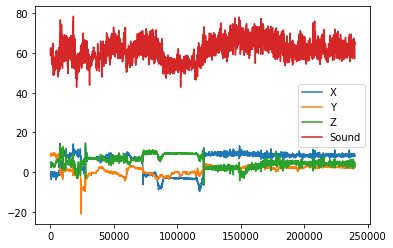

In [4]:
plot_train(car_train)

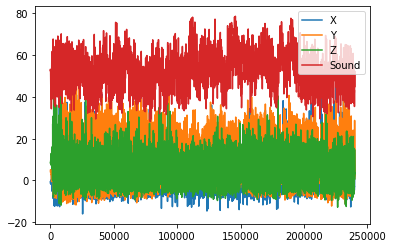

In [5]:
plot_train(running_train)

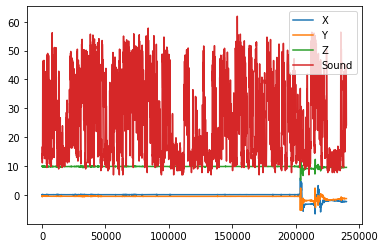

In [6]:
plot_train(sit_train)

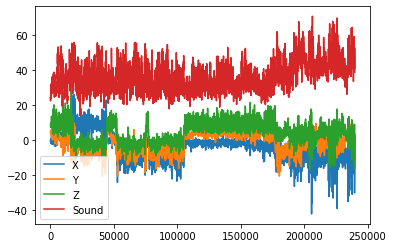

In [7]:
plot_train(stairs_train)

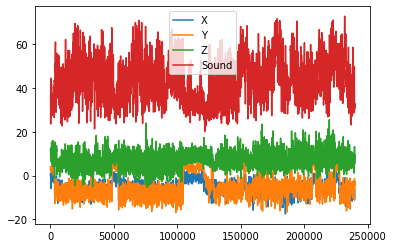

In [8]:
plot_train(walking_train)

In [9]:
x_train = []
y_train = []

def train(df, activity):
    start = 0
    end = 150
    all_x = []
    all_y = []
    
    while end <= 2700:
        mean = df[start : end].mean().tolist()
        std = df[start : end].std().tolist()
        skew = df[start : end].skew().tolist()
        all_x.append(mean)
        all_y.append(activity)
        all_x.append(std)
        all_y.append(activity)
        all_x.append(skew)
        all_y.append(activity)
        start += 150
        end += 150
    global x_train
    global y_train
    x_train += all_x
    y_train += all_y
    
train(sit_train, 'sitting')
train(running_train, 'running')
train(walking_train, 'walking')
train(stairs_train, 'stairs')
train(car_train, 'driving')

test_data = [sit_test.mean().tolist()] + [sit_test.std().tolist()] + [sit_test.skew().tolist()]+ [running_test.mean().tolist()] + [running_test.std().tolist()] + [running_test.skew().tolist()] + [walking_test.mean().tolist()] + [walking_test.std().tolist()] + [walking_test.skew().tolist()] + [stairs_test.mean().tolist()] + [stairs_test.std().tolist()] + [stairs_test.skew().tolist()] +[car_test.mean().tolist()] + [car_test.std().tolist()] + [car_test.skew().tolist()]
actual = ['sitting', 'sitting', 'sitting', 'running', 'running', 'running', 'walking', 'walking', 'walking', 'stairs', 'stairs', 'stairs', 'driving', 'driving', 'driving']

# Decision Tree

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

In [11]:
from sklearn import metrics
metrics.accuracy_score(clf.predict(test_data), actual)

0.5333333333333333

# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [13]:
metrics.accuracy_score(knn.predict(test_data), actual)

0.26666666666666666

# Linear Regression

In [14]:
from sklearn import linear_model
import pandas as pd

regr = linear_model.LogisticRegression(solver='liblinear', max_iter=1000).fit(x_train, y_train)

In [15]:
metrics.accuracy_score(regr.predict(test_data), actual)

0.4666666666666667